====================================================================

Nama : Elia Oktaviani

Batch: RMT 028

====================================================================

Link Dashboard:

https://public.tableau.com/app/profile/elia.oktaviani/viz/Milestone1EliaOktaviani/Dashboard1?publish=yes

# TOPIK PERMASALAHAN

LATAR BELAKANG

Sebagai salah satu data analis yang bergerak pada sektor industri dan retail. Saya menjalankan tugas bersama tim marketing untuk mengetahui preferensi dan perilaku dari customer, dalam rangka membuat plan marketing yang lebih efektif sehingga dapat meningkatkan jumlah pelanggan. Untuk mencapai hal tersebut, adapun kita harus melakukan kajian data pada tahun 2018 hingga 2020 agar kita mendapat gambaran tentang pola peak pembelian di tiap musim, preferensi cara berbelanja hingga efek diskon terhadap pembelian produk.

SMART

Specific	: meningkatkan retention rate dengan menerapkan strategi marketing yang 	lebih terfokus.

Measurable	: Adanya peningkatan  retention rate hingga 90% 

Achievable	: Analisis faktor yang mempengaruhi penjualan produk dan preferensi customer dalam membeli produk.

Relevant	: Menerapkan diskon di waktu yang tepat agar menghasilkan impact yang besar untuk menarik customer 

Time bound	: Dihasilkan retention rate 90% dalam waktu 1 tahun..


PROBLEM STATEMENT

Meningkatkan retention rate dengan mempertimbangkan Preferensi dan Perilaku Pembeli di Amerika Serikat pada tahun 2018 hingga 2020.

Penjabaran masalah dengan metode 5W+1H:

1. (retention rate) berapakah retention rate pada jumlah pembeli di amerika serikat

2. (Churn rate, visual pelanggan awal dan pelanggan akhir) Berapa banyak customer yang bertahan berlangganan membeli produk pada akhir 2020? (churn rate dari customer id)

3. (visualisasi waktu vs order quantity) Apakah ada bulan atau season tertentu yang mengalami kenaikan pembelian barang di amerika serikat


4. (Visualisasi Sum of OrderID vs year dan SUM of Order quantity  vs year ) Channel manakah yang memiliki jumlah penjualan paling tinggi per tahunnya?

5. (deskriptif) Berapakah harga rata-rata per unit produk yang dibeli dalam satu kali transasksi

6. (INFERENS max and min confidence level) Berapakah penjualan maksimal dan minimal pada channel in-store secara keseluruhan

7. (korelasi, deskriptif, diskon vs order quantity) Bagaimana perilaku konsumen terhadap pembelian barang yang memiliki diskon?





LOADING DATA

SUMBER DATA:

https://www.kaggle.com/datasets/talhabu/us-regional-sales-data/data

In [21]:
#import package
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
import seaborn as sns

In [5]:
#read dataframe 'df' dari file csv US_Regional_Sales_Data.csv
df = pd.read_csv(r"US_Regional_Sales_Data.csv")

#tampilkan 5 baris data teratas
df.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,"1,001.18","1,963.10"
1,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,"3,348.66","3,939.60"
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,"1,775.50"
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,"1,464.69","2,324.90"
4,SO - 000105,Distributor,WARE-NMK1003,10/4/18,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,"1,476.14","1,822.40"


In [6]:
#cek banyak data yang kosong (hasilnya, data sudah terisi semua)
df.isnull().sum()

OrderNumber         0
Sales Channel       0
WarehouseCode       0
ProcuredDate        0
OrderDate           0
ShipDate            0
DeliveryDate        0
CurrencyCode        0
_SalesTeamID        0
_CustomerID         0
_StoreID            0
_ProductID          0
Order Quantity      0
Discount Applied    0
Unit Cost           0
Unit Price          0
dtype: int64

In [7]:
#cek tipe data pada setiap kolom
df.dtypes

OrderNumber          object
Sales Channel        object
WarehouseCode        object
ProcuredDate         object
OrderDate            object
ShipDate             object
DeliveryDate         object
CurrencyCode         object
_SalesTeamID          int64
_CustomerID           int64
_StoreID              int64
_ProductID            int64
Order Quantity        int64
Discount Applied    float64
Unit Cost            object
Unit Price           object
dtype: object

DATA CLEANING

In [8]:
#ubah tipe data Order Date jadi datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

#drop data yang tidak diperlukan
df = df.drop('ProcuredDate', axis=1)
df = df.drop('ShipDate', axis=1)
df = df.drop('DeliveryDate', axis=1)
df = df.drop('_SalesTeamID', axis=1)

#data clenaing
df["Unit Price"] = df["Unit Price"].str.replace(',','').astype(float)
df["Unit Cost"] =  df["Unit Cost"].str.replace(',','').astype(float)
df

/var/folders/sq/0g7v2j4s5196qrnzglgpzfl00000gn/T/ipykernel_13670/1685582552.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['OrderDate'] = pd.to_datetime(df['OrderDate'])


,OrderNumber,Sales Channel,WarehouseCode,OrderDate,CurrencyCode,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,2018-05-31,USD,15,259,12,5,0.075,1001.18,1963.1
1,SO - 000102,Online,WARE-NMK1003,2018-05-31,USD,20,196,27,3,0.075,3348.66,3939.6
2,SO - 000103,Distributor,WARE-UHY1004,2018-05-31,USD,16,213,16,1,0.050,781.22,1775.5
3,SO - 000104,Wholesale,WARE-NMK1003,2018-05-31,USD,48,107,23,8,0.075,1464.69,2324.9
4,SO - 000105,Distributor,WARE-NMK1003,2018-05-31,USD,49,111,26,8,0.100,1476.14,1822.4
...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0008087,In-Store,WARE-MKL1006,2020-12-30,USD,41,339,29,1,0.075,121.94,234.5
7987,SO - 0008088,Online,WARE-NMK1003,2020-12-30,USD,29,202,3,6,0.050,1921.56,3202.6
7988,SO - 0008089,Online,WARE-UHY1004,2020-12-30,USD,32,241,35,5,0.200,2792.76,3825.7
7989,SO - 0008090,Online,WARE-NMK1003,2020-12-30,USD,42,112,36,8,0.100,804.00,1072.0


In [9]:
#cek tipe data setiap kolom
df.dtypes

OrderNumber                 object
Sales Channel               object
WarehouseCode               object
OrderDate           datetime64[ns]
CurrencyCode                object
_CustomerID                  int64
_StoreID                     int64
_ProductID                   int64
Order Quantity               int64
Discount Applied           float64
Unit Cost                  float64
Unit Price                 float64
dtype: object

ANALISIS DAN PERHITUNGAN

Pada analisis ini akan dimulai dari melihat apakah pelanggan kita tetap loyal untuk membeli produk kita selama rentang 2018 hingga 2020

In [10]:
#select data unik tahun
df['OrderDate'].dt.year.unique()

array([2018, 2019, 2020], dtype=int32)

Pada tahap awal kita lihat dulu apakah benar data yang akan kita olah berasal dari tahun 2018 hingga 2020. Dan output terbukti benar

In [24]:
# list old customers
filtered_df = df[(df['OrderDate'].dt.year == 2018) | (df['OrderDate'].dt.year == 2019)]
list_old_customer = filtered_df['_CustomerID'].unique()
list_old_customer
len(list_old_customer)

50

Untuk list customer lama, diambil data customer yang melakukan transaksi pada tahun 2018 dan 2019

In [25]:
# list new customer
filtered_df = df[(df['OrderDate'].dt.year == 2020)]
list_2020_customer = filtered_df['_CustomerID'].unique()
list_2020_customer
len(list_2020_customer)

50

Untuk list customer baru, diambil data customer yang melakukan transaksi pada tahun 2020

In [27]:
# list new customer in 2020
new_customer = []

for customer in list_old_customer:
    if customer in list_2020_customer:
        continue
    else:
        new_cutomer.append(customer)

new_customer

[]

Untuk mencari list customer  baru dilakukan looping untuk memasukan id customer yang belum ada pada data customer lama. Hasilnya tidak ada customer baru. Dengan informasi ini didapatkan bahwa pada tahun 2020 tim marketing belum berhasil menambah customer baru

In [28]:
# retention rate
retention_rate = (len(list_2020_customer) - len(new_customer))/len(list_old_customer) * 100
print(retention_rate, "%")

100.0 %


Dengan data tersebut dapat diolah menjadi retention rate, dan diapat nilai 100%. Berarti customer perusahaan adalah customer yang loyal dan setia pada produk yang kami tawarkan. Retention rate sudah berhasil di atas 90%. Dan perlu dipertahan kan nilai 100 tersebut.

In [29]:
# churn rate
churn_rate = (len(list_2020_customer) - len(list_old_customer))/len(list_old_customer)

print(churn_rate)

0.0


Dari pengolahan dat achurn rate juga didapat angka nol, menandakan bahwa pelanggan perusahaan tetap setia dan tidak ada yang berhenti berlangganan.

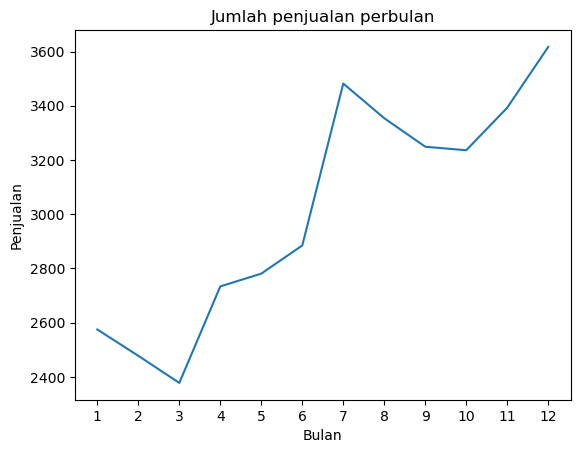

In [57]:
#visualisasi waktu VS sum of order quantity
df['Month'] = df['OrderDate'].dt.month
sum_order_quantity_monthly = df.groupby('Month')['Order Quantity'].sum()
plt.plot(sum_order_quantity_monthly.index.astype(str), sum_order_quantity_monthly.values)
plt.title('Jumlah penjualan perbulan')
plt.xlabel('Bulan')
plt.ylabel('Penjualan')
plt.show()


Selanjutnya untuk mengetahui perilaku konsumen, kita mengumpulkan banyaknya penjualan setiap bulannya maka kita bisa melihat pola bahwa:
- secara keseluruhan penjualan meningkat dari kondisi awal ke akhir
- penjualan cenderung rendah pada kuarter 1 dan kemudian mulai meningkat pada kuarter ke 2 dan selanjutnya
- customer paling banyak membeli produk kita pada waktu akhir tahun

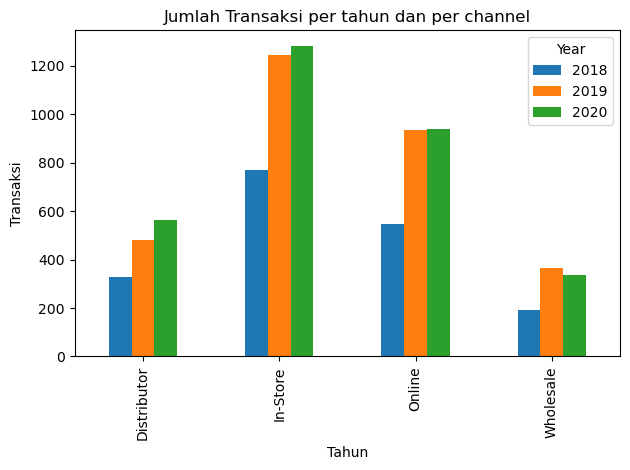

In [30]:
df['Year'] = df['OrderDate'].dt.year
data = df.groupby(['Sales Channel', 'Year'])['OrderNumber'].count().unstack()

data.plot(kind='bar')
plt.title('Jumlah Transaksi per tahun dan per channel')
plt.xlabel('Tahun')
plt.ylabel('Transaksi')
plt.tight_layout()
plt.show()

Dari data tersebut kita dapat melihat bahwa transasksi terbanyak tiap tahunnya ada pada channet In-store. Hal tersebut menunjukan bahwa customer kita lebih suka untuk berbelanja langsung di toko dibandingkan memlalui distributor, online maupun wholesale. Hal ini dapat dipengaruhi faktor experience berbelanja, rekomendasi tim sales yang bertugas, tidak adanya waktu jeda untuk pengiriman barang dan jaminan kualitas barang di Toko. 


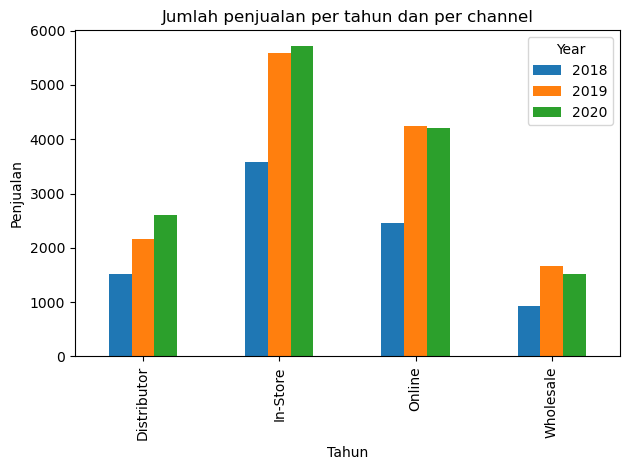

In [59]:
df['Year'] = df['OrderDate'].dt.year
data = df.groupby(['Sales Channel', 'Year'])['Order Quantity'].sum().unstack()

data.plot(kind='bar')
plt.title('Jumlah penjualan per tahun dan per channel')
plt.xlabel('Tahun')
plt.ylabel('Penjualan')
plt.tight_layout()
plt.show()

Dari grafik juga dapat dilihat bahwa customer cenderung membeli lebih banyak barang pada channel in store, mendukung statement bawhwa customer lebih merasa terjamin atas kualitas produknya jika melihat langsung ke toko

In [19]:
# deskriptif, central tendency
print('mean: ',df["Unit Price"].mean())
print('median: ', df["Unit Price"].median())
print('modus: ', df["Unit Price"].mode().values[0])

mean:  2284.536503566512
median:  1849.2
modus:  1051.9


untuk berikutnya dilakukan perhitungan nilai tengah dari harga produk yang dijual. Pada kasus ini diketahui bahwa adanya data yang tidak terdistribusi secara simestris, dalam artian ada anomali data yang bernilai esktrem sehingga memperngaruhi nilai mean. Jadi nilai tengah yang merepresentasikan harga unit produk adalah median dengan harga USD $1849.2. Angka yang besar ini menunjukan bahwa customer perusahaan kita cukup konsumtif

In [83]:
data_in_store = df[df['Sales Channel'] == 'In-Store']
skewness_penjualan = data_in_store['Order Quantity'].skew()

print(f'Kecondongan grafik: {skewness_penjualan}')

N = len(data_in_store)
Median = df['Order Quantity'].median()
q3 = df['Order Quantity'].quantile(0.75)
q1 = df['Order Quantity'].quantile(0.25)
IQR = q3 - q1

Upper = Median + 1.7 * (1.25*IQR / (1.35*sqrt(N)))
Lower = Median - 1.7 * (1.25*IQR / (1.35*sqrt(N)))

print(f'Penjualan minimal: {Lower}')
print(f'Penjualan maksimal: {Upper}')

Kecondongan grafik: 2.945252543810852e-05
Penjualan minimal: 4.890362321379448
Penjualan maksimal: 5.109637678620552


Hasil perhitungan potensi minimum dan maksimum banyak nya produk yang dibeli costumer cenderung mendekati angka bulat 5. Informasi tersebut menunjukan bahwa potensi customer untuk membeli produk adalah 5 produk dalam 1 kali transaksi.

In [96]:
corr_rho, pval_s = stats.spearmanr(df['Order Quantity'], df['Discount Applied'])

(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")

'rho-correlation: -0.01, p-value: 0.19566725015503453'

Nilai dari p menunjukan angka di 0.19 yang jauh lebih besar daripada 0.05 menandakan bahwa ada suatu efek yang sangat kecil dari diskon yang diberikan terhadap jumlah item yang berhasil dijual. Hal tersebut dijelaskan pada nilai rho -0.01, jika diskon sedikit maka customer akan beli lebih sedikit produk dari retail kita.

/Users/vincenttanjaya/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


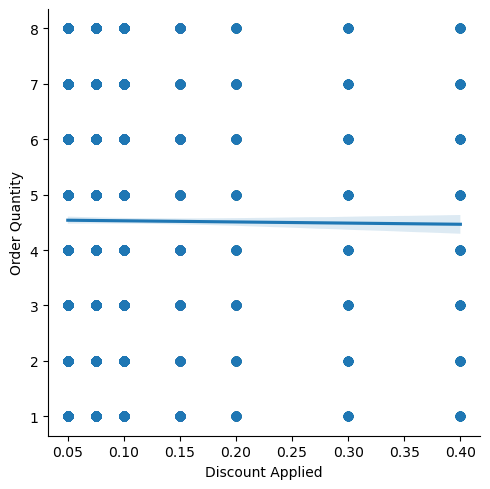

In [23]:
sns.lmplot(data=df,x='Discount Applied', y='Order Quantity')

Dari grafik pun juga diperlihatkan garis yang menyatakan efek diskon terhadap jumlah pejualan produk yang sangat tipis. dalam arti tidak bepengaruh signifikan 

LINK DASHBOARD:

https://public.tableau.com/app/profile/elia.oktaviani/viz/Milestone1EliaOktaviani/Dashboard1?publish=yes

# Kesimpulan

Berdasarkan hasil data analisis dapat disimpulkan bahwa cutomer yang membeli produk di perusahaan kita adalah pelanggan tetap dengan loyalitas yang tinggi dengan retention rate di angka 100% (sudah melebihi terget) dan churn rate 0.0.

Karakteristik loyal tersebut dapat dilihat dari retention rate yang sempurna 100% dan churn rate yang sempurna 0.0. Selain itu nilai potensi pembelian langsung 5 produk dari 1 kali transasksi. Perilaku customer kita lebih suka untuk berbelanja langsung untuk membeli barang kita, serta efek diskon hanya memberi efek yang sangat kecil terhadap jumlah pembelian produk

Namun, untuk ke depannya disarankan melakukan mengembangan target pasar agar dapat menjangkau customer baru (belum ada di tahun 2020).